In [199]:
import copy
import math

import numpy as np
from numpy.linalg import inv, norm

def create_example_F():
    """
    Создание примерной матрицы F размером 5x5 с реальными значениями.
    """
    F = np.array([
        [1, 0.8, 0.6, 0.4, 0],
        [0.8, 1, 0.8, 0.6, 0.4],
        [0.6, 0.8, 1, 0.8, 0.6],
        [0.4, 0.6, 0.8, 1, 0.8],
        [0, 0.4, 0.6, 0.8, 1]
    ])
    # F = np.array([
    #     [1, 0.5, 0.2, 0.1, 0],
    #     [0.5, 1, 0.5, 0.2, 0.1],
    #     [0.2, 0.5, 1, 0.5, 0.2],
    #     [0.1, 0.2, 0.5, 1, 0.5],
    #     [0, 0.1, 0.2, 0.5, 1]
    # ])
    # F = np.array([
    #     [1, 1, 1, 1, 1],
    #     [1, 1, 1, 1, 1],
    #     [1, 1, 1, 1, 1],
    #     [1, 1, 1, 1, 1],
    #     [1, 1, 1, 1, 1],
    # ])
    return F

# Генерация данных для демонстрации
np.random.seed(0)
# data1 = np.random.randn(5)
data2 = [10, 1, 1, 1, -10]

# Создание примерной матрицы F
F = create_example_F()

# Расчет J_lambda
lambda_param = 100
Gamma = np.eye(5)
J_lambda = inv(F.T @ F + lambda_param * Gamma.T @ Gamma) @ F.T

# Функция для расчета нормы плотности тока
def calculate_current_density_norm(mixing_vector, J_lambda, Gamma):
    a_normalized = mixing_vector / norm(mixing_vector)
    z = J_lambda @ a_normalized
    return np.log(norm(Gamma @ z))

def calc_cdn(val):
    return calculate_current_density_norm(val, J_lambda, Gamma)

# Расчет норм для каждого массива данных
# current_density_norm1 = calculate_current_density_norm(data1, J_lambda, Gamma)
current_density_norm2 = calculate_current_density_norm(data2, J_lambda, Gamma)

current_density_norm2


-4.510219014939558

In [4]:
import numpy as np

# Генерация данных для демонстрации
np.random.seed(0)

# Ситуация 1: Сигнал сконцентрирован в определенной области
data_concentrated = np.zeros((1000, 25))
data_concentrated[:, 0:5] = np.random.randn(1000, 5)  # Активность только на первых 5 электродах

# Ситуация 2: Сигнал равномерно распределен
data_uniform = np.random.randn(1000, 25)  # Активность на всех 25 электродах

# Функция для расчета пространственного распределения
def spatial_dispersion(data):
    """
    Вычисление пространственного распределения потенциалов на электродах.
    
    data: массив данных ЭЭГ размером (N, M), где N - количество временных точек, M - количество электродов.
    """
    # Среднее значение по всем электродам для каждой временной точки
    mean_potentials = np.mean(data, axis=1)

    # Вычитание среднего значения для каждого временного ряда (центровка данных)
    centered_data = data - mean_potentials[:, np.newaxis]

    # Вычисление пространственного разброса как стандартного отклонения по электродам
    dispersion = np.std(centered_data, axis=1)

    return dispersion

# Расчет пространственного распределения для обоих случаев
dispersion_concentrated = spatial_dispersion(data_concentrated)
dispersion_uniform = spatial_dispersion(data_uniform)

# Вывод значений для первых 10 временных точек
print("Dispersion for concentrated signal (first 10 points):", dispersion_concentrated[:10])
print("Dispersion for uniform signal (first 10 points):", dispersion_uniform[:10])



Dispersion for concentrated signal (first 10 points): [0.65225757 0.28700038 0.32152498 0.35588763 0.73171335 0.5130936
 0.43413153 0.35104867 0.625895   0.43430466]
Dispersion for uniform signal (first 10 points): [1.20484108 1.01546339 1.15221892 0.87255529 0.91305356 0.98362431
 1.05833593 1.00295733 0.87801037 0.87617822]


In [115]:
import numpy as np

# Генерация случайных данных для демонстрации (замените на реальные данные)
np.random.seed(0)

# Ситуация 1: Сигнал сконцентрирован в определенной области
data_concentrated = np.zeros((10, 5))
data_concentrated[:, 0:2] = np.random.randn(10, 2)  # Активность только на первых 5 электродах

# Ситуация 2: Сигнал равномерно распределен
data_uniform = np.random.randn(10, 5)  # Активность на всех 25 электродах

# Функция для расчета пространственного разброса
def spatial_dispersion(data):
    """
    Вычисление пространственного распределения потенциалов на электродах.
    
    data: массив данных ЭЭГ размером (N, M), где N - количество временных точек, M - количество электродов.
    """
    # Среднее значение по всем электродам для каждой временной точки
    mean_potentials = np.mean(data, axis=1)

    # Вычитание среднего значения для каждого временного ряда (центровка данных)
    centered_data = data - mean_potentials[:, np.newaxis]

    # Вычисление пространственного разброса как стандартного отклонения по электродам
    dispersion = np.std(centered_data, axis=1)

    return dispersion

# Расчет пространственного распределения для обоих случаев
dispersion_concentrated = spatial_dispersion(data_concentrated)
dispersion_uniform = spatial_dispersion(data_uniform)

# Вывод значений для первых 10 временных точек
print("Dispersion for concentrated signal (first 10 points):", dispersion_concentrated[:10])
print("Dispersion for uniform signal (first 10 points):", dispersion_uniform[:10])


Dispersion for concentrated signal (first 10 points): [0.68340996 0.883892   0.92567005 0.39949536 0.17908032 0.57004149
 0.29602259 0.19361828 0.62323331 0.39216034]
Dispersion for uniform signal (first 10 points): [1.63378563 1.11939056 0.84376137 0.70762279 1.31132754 0.83836533
 0.56819045 0.40133484 0.62455595 0.73257656]


In [135]:
from filenames_and_paths import *
import mne

raw = mne.io.read_raw_eeglab(folders.preprocessed_data + path014 + filenames014[0] + '.set')


C:\Users\bortn\AppData\Local\Temp\ipykernel_52424\1679051696.py:4: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(folders.preprocessed_data + path014 + filenames014[0] + '.set')
C:\Users\bortn\AppData\Local\Temp\ipykernel_52424\1679051696.py:4: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(folders.preprocessed_data + path014 + filenames014[0] + '.set')


In [181]:
montage: mne.channels.DigMontage = raw.get_montage()
positions = montage.get_positions()['ch_pos']
# for ch in positions:
#     print(ch)
#     pos = positions[ch]
#     pos[2] = 0
#     pos[0] = np.round(pos[0], 3)
#     pos[1] = np.round(pos[1], 3)
#     # print(pos)
#     positions[ch] = pos

# montage.plot()
    

In [385]:
import numpy as np
import math
# Пример трехмерных координат для 61 электродов (замените на реальные координаты)
# Здесь мы используем случайные координаты для демонстрации
coordinates_3d = np.array(list(positions.values())) # Замените на реальные координаты

# Функция для вычисления расстояний между электродами
def calculate_distances(coords):
    size = coords.shape[0]
    distances = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            distances[i, j] = np.linalg.norm(coords[i] - coords[j])
    return distances

# Функция для создания матрицы влияния на основе расстояний
# Функция для создания матрицы влияния на основе расстояний
def create_influence_matrix(distances, max_influence=1, decay_rate=1e-5, epsilon=1e-5):
    size = distances.shape[0]
    influence_matrix = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if i == j:
                influence_matrix[i, j] = max_influence
            else:
                influence_matrix[i, j] = max_influence * np.exp(-decay_rate * distances[i, j])
    return influence_matrix

# Вычисление расстояний и создание матрицы влияния
distances_3d = calculate_distances(coordinates_3d)
influence_matrix_3d = create_influence_matrix(distances_3d, 1, 3)

# Проверка симметричности матрицы
influence_matrix_3d = (influence_matrix_3d + influence_matrix_3d.T) / 2

print(influence_matrix_3d)


[[1.         0.91303455 0.83698307 ... 0.57670349 0.54760251 0.54527553]
 [0.91303455 1.         0.91276615 ... 0.55914116 0.55869996 0.54259474]
 [0.83698307 0.91276615 1.         ... 0.54655143 0.57476933 0.54363487]
 ...
 [0.57670349 0.55914116 0.54655143 ... 1.         0.71783095 0.83819425]
 [0.54760251 0.55869996 0.57476933 ... 0.71783095 1.         0.83679953]
 [0.54527553 0.54259474 0.54363487 ... 0.83819425 0.83679953 1.        ]]


In [386]:
influence_matrix_3d

array([[1.        , 0.91303455, 0.83698307, ..., 0.57670349, 0.54760251,
        0.54527553],
       [0.91303455, 1.        , 0.91276615, ..., 0.55914116, 0.55869996,
        0.54259474],
       [0.83698307, 0.91276615, 1.        , ..., 0.54655143, 0.57476933,
        0.54363487],
       ...,
       [0.57670349, 0.55914116, 0.54655143, ..., 1.        , 0.71783095,
        0.83819425],
       [0.54760251, 0.55869996, 0.57476933, ..., 0.71783095, 1.        ,
        0.83679953],
       [0.54527553, 0.54259474, 0.54363487, ..., 0.83819425, 0.83679953,
        1.        ]])

In [387]:
F = influence_matrix_3d

In [388]:
# Расчет J_lambda
lambda_param = 100
Gamma = np.eye(61)
J_lambda = inv(F.T @ F + lambda_param * Gamma.T @ Gamma) @ F.T

# Функция для расчета нормы плотности тока
def calculate_current_density_norm(mixing_vector, J_lambda, Gamma):
    a_normalized = mixing_vector / norm(mixing_vector)
    z = J_lambda @ a_normalized
    return np.log(norm(Gamma @ z))

def calc_cdn(val):
    return calculate_current_density_norm(val, J_lambda, Gamma)

In [389]:
data = raw.get_data()


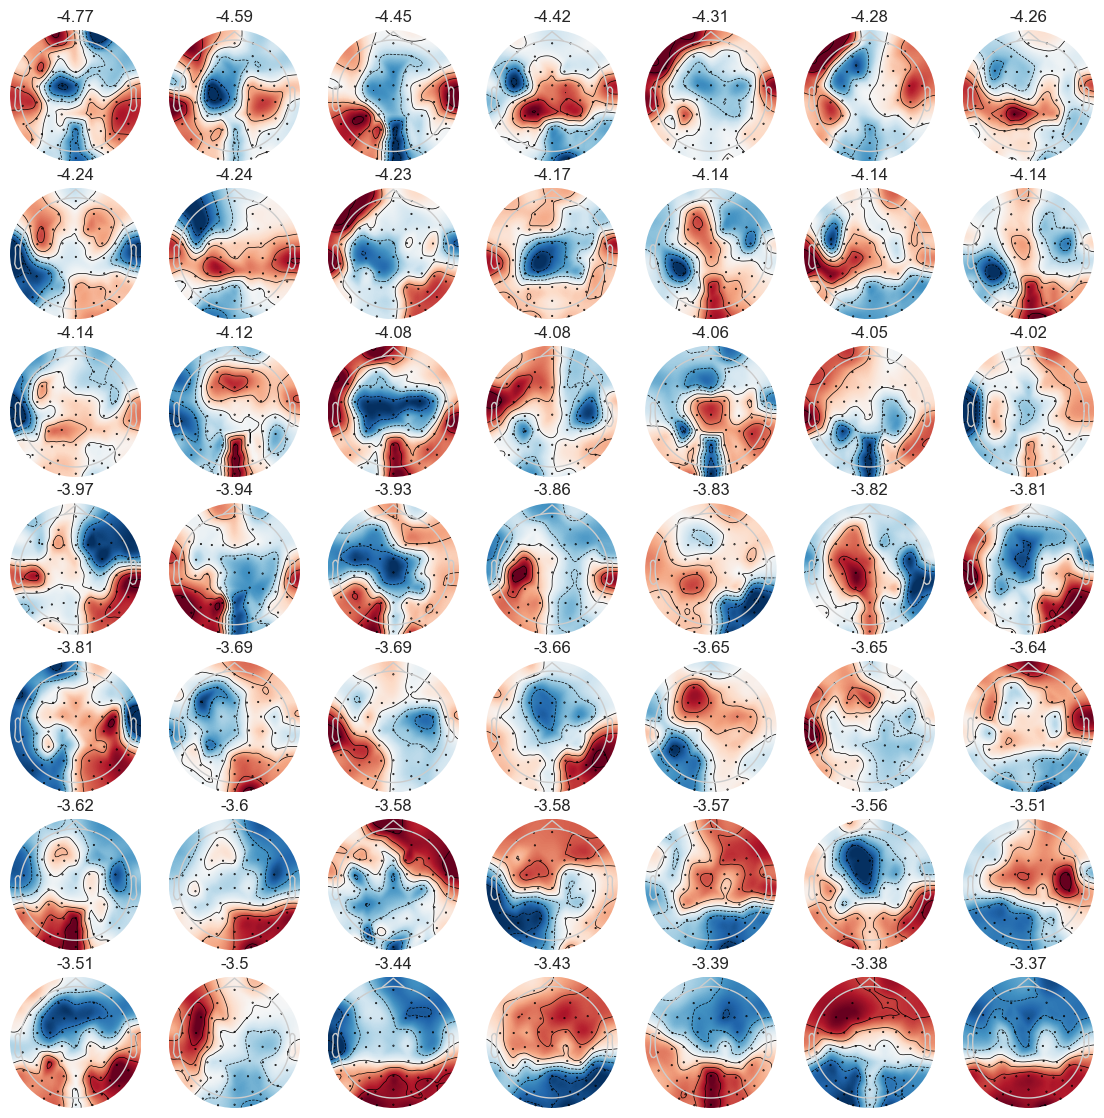

In [391]:
import matplotlib.pyplot as plt
import copy

amount = 7

fig, ax = plt.subplots(amount, amount, figsize=(amount*2, amount*2))


vals = []
for i in range(amount**2):
    num = i*10000
    val = data.T[num]
    coef = np.round(calc_cdn(val), 2)
    vals.append((coef, num))

vals.sort(key=(lambda x: x[0]))
    
for i in range(amount):
    for j in range(amount):
        coef, num = vals[(i*amount)+j]
        val = data.T[num]
        mne.viz.plot_topomap(val, raw.info, axes=ax[i][j], show=False)
        ax[i][j].set_title(coef)




In [401]:
import neurokit2 as nk

gfp = nk.eeg_gfp(data)

In [402]:
peaks = nk.microstates_peaks(data, gfp, 2048, 0)

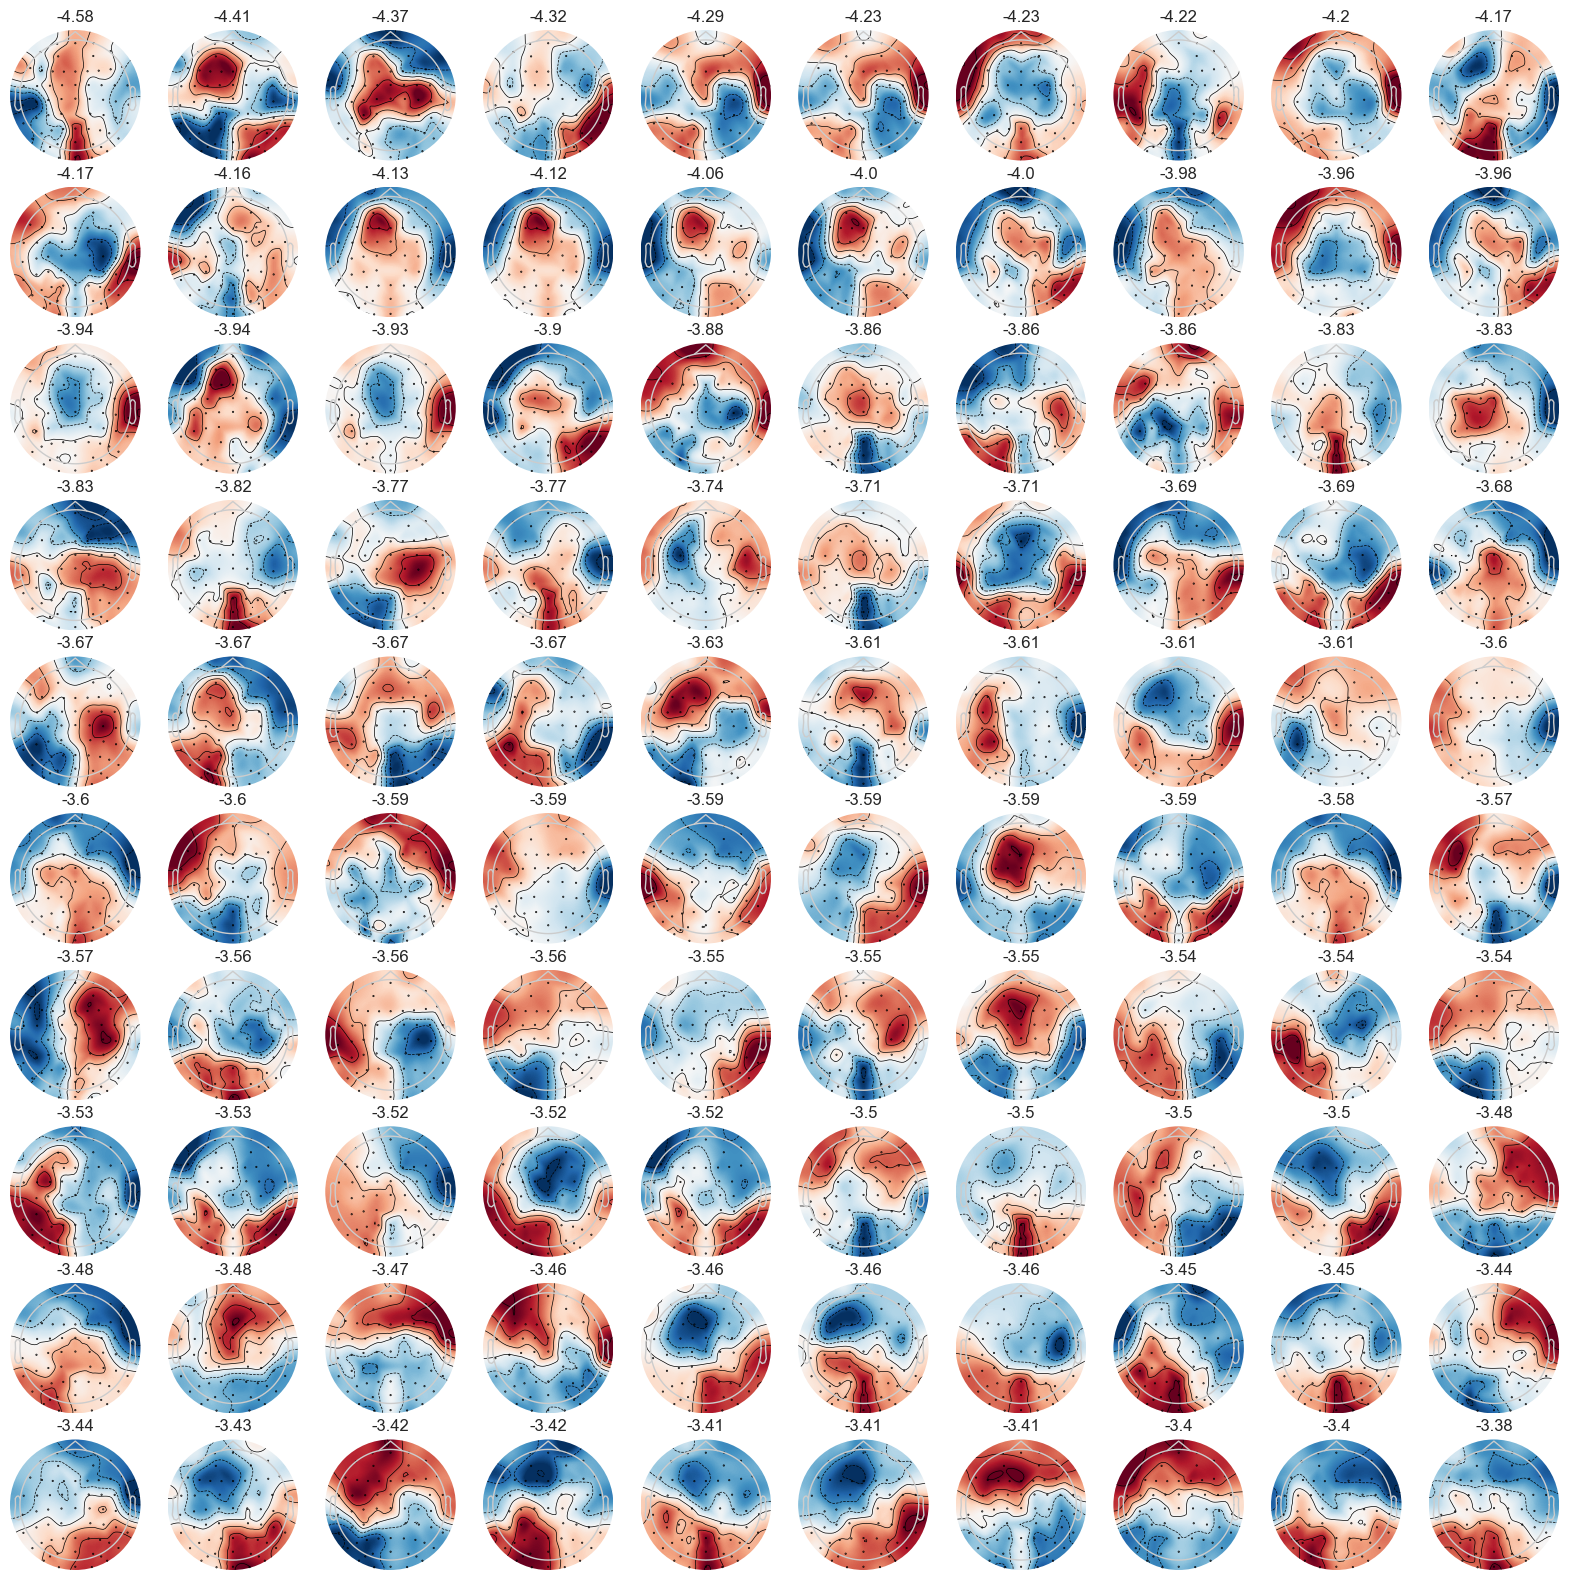

In [407]:
amount = 10

fig, ax = plt.subplots(amount, amount, figsize=(amount*2, amount*2))


vals = []
for i in range(amount**2):
    num = peaks[i]
    val = data.T[num]
    coef = np.round(calc_cdn(val), 2)
    vals.append((coef, num))

vals.sort(key=(lambda x: x[0]))

for i in range(amount):
    for j in range(amount):
        coef, num = vals[(i*amount)+j]
        val = data.T[num]
        mne.viz.plot_topomap(val, raw.info, axes=ax[i][j], show=False)
        ax[i][j].set_title(coef)